## Load Packages and Extra Functions

In [1]:
using Printf, Dates, Statistics, Distributions, XLSX

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

gr(size=(480,320))
default(fmt = :svg)

# Loading Daily S&P 500 Data

The data file contains some missing values indicated by the value -999.99. Do not use those observations when the S&P level is missing. 

1. Calculate daily returns (treat missing days as if they do not exist).

2. Create a vector of dates (from the first column in the data set).

In [3]:
xx = XLSX.readxlsx("Data/PS08_Data.xlsx")  #reads a sheet from the xlsx file
x  = xx["SP500RfPs!A2:B17870"]             #pick out some cells

...do the rest

Number of days in the sample: 17864


# Task 1

1. Show a normalised histogram of the returns. Use the bins `-5:0.25:5`
2. Add a curve for the density of the best fitting $N(\mu,\sigma)$ distribution.

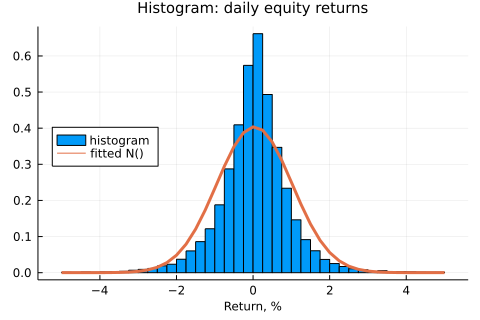

In [4]:
(μ,σ) = (mean(R),std(R))

xGrid = -5:0.25:5
pdfX  = pdf.(Normal(μ,σ),xGrid) #"Distributions" wants σ, not σ^2

do the rest...

# Task 2

1. Calculate the quantile 0.01 in the data and according to the fitted normal distribution. Change the sign and call it "99% Value at Risk". Hint: `quantile(R,0.01)`and `quantile(Normal(μ,σ),0.01)`

2. Calculate the expected return conditional on the return being less than the 5th quantile, both in data and according to the normal distribution. Change sign and call it "expected shortfall". Hint: `mean(TruncatedNormal(μ,σ,-Inf,quantile001))`


# Task 3

Construct an simple estimate of $\sigma_t^2$ as a backward looking exponential moving average

$\sigma_t^2 = \lambda \sigma_{t-1}^2 + (1-\lambda) (R_{t-1} -\mu_{t-1})^2$,
where $\mu_{t}=\lambda \mu_{t-1} + (1-\lambda) R_{t-1}$ 

Use $\lambda=0.94$

Plot the standard deviation in a time series plot.

# Task 4

Calculate 99% VaR and ES according to time-varying normal distributions `Normal(μ[t],sqrt(σ²[t]))` and plot the results (as time series plots).